In [221]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from config import weather_api_key
from datetime import datetime
import time
import numpy as np

In [222]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [223]:
cities = ["Shanghai","London","New York"]
for city in cities:
    city_url = url + "&q=" + city
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()
    print(f"weather is good in " + city)

weather is good in Shanghai
weather is good in London
weather is good in New York


In [237]:
country_list = weather_json["sys"]["country"]
print(country_list)

US


In [238]:
weather_json

{'coord': {'lon': -74.006, 'lat': 40.7143},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 53.92,
  'feels_like': 51.08,
  'temp_min': 50.85,
  'temp_max': 57,
  'pressure': 1009,
  'humidity': 44},
 'visibility': 10000,
 'wind': {'speed': 15.01, 'deg': 280, 'gust': 23},
 'clouds': {'all': 0},
 'dt': 1666203438,
 'sys': {'type': 2,
  'id': 2039034,
  'country': 'US',
  'sunrise': 1666177880,
  'sunset': 1666217417},
 'timezone': -14400,
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

In [229]:
weather_json["dt"]

1666203438

In [186]:
for city in cities:

    lat = weather_json["coord"]["lat"]
    lng = weather_json["coord"]["lon"]
    max_temp = weather_json["main"]["temp_max"]
    humidity = weather_json["main"]["humidity"]
    clouds = weather_json["clouds"]["all"]
    wind = weather_json["wind"]["speed"]
    print(lat, lng, max_temp, humidity, clouds, wind)

40.7143 -74.006 56.52 45 22 11.01
40.7143 -74.006 56.52 45 22 11.01
40.7143 -74.006 56.52 45 22 11.01


In [187]:
date = weather_json["dt"]
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 10, 19, 17, 58, 2)

In [188]:
time = datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')
time

'2022-10-19 17:58:02'

In [189]:
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [190]:
# Loop through all the cities in our list.

for city in cities:
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------


In [191]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shanghai,40.7143,-74.006,56.52,45,22,11.01,US,2022-10-19 17:58:02
1,London,40.7143,-74.006,56.52,45,22,11.01,US,2022-10-19 17:58:02
2,New York,40.7143,-74.006,56.52,45,22,11.01,US,2022-10-19 17:58:02


In [214]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shanghai,40.7143,-74.006,56.52,45,22,11.01,US,2022-10-19 17:58:02
1,London,40.7143,-74.006,56.52,45,22,11.01,US,2022-10-19 17:58:02
2,New York,40.7143,-74.006,56.52,45,22,11.01,US,2022-10-19 17:58:02


In [215]:
lats

0    40.7143
1    40.7143
2    40.7143
Name: Lat, dtype: float64

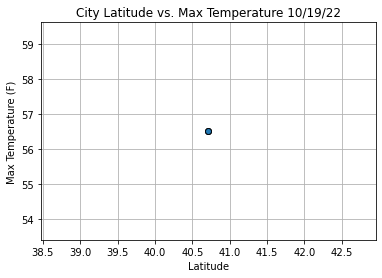

In [220]:
plt.scatter(lats,
        max_temps,
        edgecolor="black", linewidths=1, marker="o",
        alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

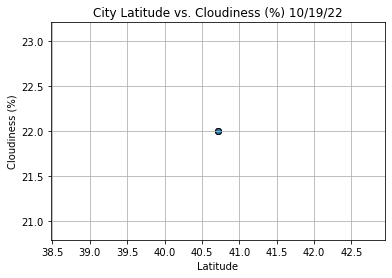

In [218]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

In [1]:
import pandas as pd
import requests
import gmaps

# Import Google API key
from config import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

In [16]:
file_path = "Weather_Database\WeatherPy_database.csv"

# Load the CSV file into a Pandas DataFrame
city_data_df = pd.read_csv(file_path)

# Display sample data
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Weather
0,Busselton,AU,-33.6500,115.3333,57.38,85,93,7.36,overcast clouds
1,Victoria,HK,22.2855,114.1577,75.38,63,86,15.99,overcast clouds
2,Vaini,TO,-21.2000,-175.2000,78.96,78,75,8.05,broken clouds
3,Price,US,39.5994,-110.8107,73.11,19,0,0.00,clear sky
4,Hermanus,ZA,-34.4187,19.2345,64.80,92,100,15.14,overcast clouds


In [10]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [18]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [31]:
city_data_df["Hotel Name"]= ""

params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels["results"][0]["name"]

'Hôtel Duo'